In [2]:
import pandas as pd
import requests
import numpy as np

In [3]:
TRAIN_URL = 'https://opendata.transport.nsw.gov.au/api/download/2df8f461-67d3-45f7-8837-16fa71c8143f'
SATATION_URL = 'https://opendata.transport.nsw.gov.au/api/download/ed849af1-59a6-42e7-826b-76713315a9fe'
META_URL = 'https://opendata.transport.nsw.gov.au/dataset/train-station-entries-and-exits-data'
META_LOG = "modified.log"
LOGIN_URL = 'https://opendata.transport.nsw.gov.au/user/login'
LOGIN_USER = 'sweetstar'
LOGIN_PWD = 'xxxx'


In [52]:
def down_csv(login_url,user,pwd):
        print('download start...')
        data = {'name': user,
                'pass': pwd,
                'form_build_id': 'form-9ylwT__-7dtpac3MwQL_T0RSAIJmkAgVZ6sBH5Hy6yw',
                'form_id': 'user_login',
                'op': 'Log in'}
        headers = {'User-agent':'Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/60.0.3112.113 Safari/537.36'}
        session = requests.Session()
        resp = session.post(login_url, data=data, headers=headers)
        if resp.status_code!=200:
          print('login failed')
          return -1
        print('login ok')
        print('dowloading train.csv')
        content = session.get(TRAIN_URL, headers=headers)
        with open("train.csv","w",newline='\n') as f:
                f.write(content.text)
        print('dowloading station.csv')
        content = session.get(SATATION_URL, headers=headers)
        with open("station.csv","w",newline='\n') as f:
                f.write(content.text)

In [54]:
#compare the metadata with .log, if changed download the new csv.
data =pd.read_html(META_URL)
modified = data[0].iloc[0,1]+','+data[0].iloc[3,1]
with open(META_LOG,"r+") as f:
    last = f.readlines()[-1]
    if modified == last:
        print('No new data')
    else:
        print('Updates the data files')
        f.write('\n'+modified)
        down_csv(LOGIN_URL, LOGIN_USER, LOGIN_PWD)

Updates the data files
download start...
login ok
dowloading train.csv
dowloading station.csv


In [4]:
traindf = pd.read_csv('train.csv')
stationdf = pd.read_csv('station.csv')

In [5]:
#simplify stationdf by averaging LAT and LONG of mutiple entrances of each stations
stationdf.drop(columns=['Street_Name','Street_Type','Entrance_Type','Exit_Number'],inplace=True)
stationdf = stationdf.groupby('Train_Station').mean(['LAT','LONG'])
stationdf = stationdf.reset_index()
stationdf

,Train_Station,LAT,LONG
0,Aberdeen,-32.166893,150.891966
1,Adamstown,-32.933587,151.720350
2,Albion Park,-34.563160,150.798893
3,Allawah,-33.969752,151.114576
4,Arlington LR,-33.902047,151.138101
...,...,...,...
346,Wynyard LR,-33.866706,151.207168
347,Wyong,-33.285247,151.425382
348,Yagoona,-33.907331,151.024677
349,Yennora,-33.864880,150.970878


In [6]:
maxdate = traindf['MonthYear'].max()
print(maxdate)
traindf_maxdt = traindf[traindf['MonthYear']==maxdate]
traindf_maxdt[traindf_maxdt['Trip'] == 'Less than 50']

2022-03


,MonthYear,Station,Entry_Exit,Trip
42454,2022-03,Aberdeen Station,Entry,Less than 50
42455,2022-03,Aberdeen Station,Exit,Less than 50
42488,2022-03,Bell Station,Entry,Less than 50
42489,2022-03,Bell Station,Exit,Less than 50
42642,2022-03,Exeter Station,Entry,Less than 50
42643,2022-03,Exeter Station,Exit,Less than 50
42670,2022-03,Greta Station,Entry,Less than 50
42671,2022-03,Greta Station,Exit,Less than 50
42692,2022-03,Hilldale Station,Entry,Less than 50
42693,2022-03,Hilldale Station,Exit,Less than 50


In [7]:
#Simply get rid of those 'Less than 50'
traindf_maxdt = traindf_maxdt[traindf_maxdt['Trip'] != 'Less than 50']
traindf_maxdt.drop(columns='MonthYear',inplace=True)
traindf_maxdt['Trip'] = traindf_maxdt['Trip'].astype('int')

In [8]:
stationdf

,Train_Station,LAT,LONG
0,Aberdeen,-32.166893,150.891966
1,Adamstown,-32.933587,151.720350
2,Albion Park,-34.563160,150.798893
3,Allawah,-33.969752,151.114576
4,Arlington LR,-33.902047,151.138101
...,...,...,...
346,Wynyard LR,-33.866706,151.207168
347,Wyong,-33.285247,151.425382
348,Yagoona,-33.907331,151.024677
349,Yennora,-33.864880,150.970878


In [9]:
stations = set(stationdf.Train_Station.unique())
stations1 = set(traindf_maxdt.Station.unique())
stations1 = set([station.replace(' Station','') for station in stations1])
print('There are {} stations in the traffic data'.format(len(stations1)))
print('There are {} stations in the station list'.format(len(stations)))
print('The station not in station list are', stations1-stations )


There are 299 stations in the traffic data
There are 351 stations in the station list
The station not in station list are {'Leppington', 'Mount Kuring-gai', 'Bathurst', 'Wolli Creek', 'Erskineville', 'Shellharbour Junction', 'Chester Hill'}


In [10]:
# The problem comes from 'typos', 'Bathurst'=33°25′32″S 149°35′00″E -> -33.425556,149.583333
to_replace = ['Chester Hil','Wolli','Mount Kurring-gai','Leppingon','Shellharbour','Ersineville']
value = ['Chester Hill','Wolli Creek', 'Mount Kuring-gai', 'Leppington', 'Shellharbour Junction', 'Erskineville']
stationdf = stationdf.replace(to_replace=to_replace, value=value)
bathurst = pd.DataFrame([['Bathurst',-33.425556,149.583333]],columns=['Train_Station','LAT','LONG'])
stationdf = pd.concat([stationdf,bathurst]).sort_values('Train_Station')

In [11]:
stations = set(stationdf.Train_Station.unique())
stations1 = set(traindf_maxdt.Station.unique())
stations1 = set([station.replace(' Station','') for station in stations1])
print('There are {} stations in the traffic data'.format(len(stations1)))
print('There are {} stations in the station list'.format(len(stations)))
print('The station not in station list are', stations1-stations )


There are 299 stations in the traffic data
There are 352 stations in the station list
The station not in station list are set()


In [12]:
traindf_maxdt = traindf_maxdt.pivot(index='Station',columns='Entry_Exit',values='Trip').reset_index()
traindf_maxdt.describe()

Entry_Exit,Entry,Exit
count,2.990000e+02,2.970000e+02
mean,5.719973e+04,5.705677e+04
std,1.348612e+05,1.384838e+05
min,6.000000e+01,7.000000e+01
25%,1.620000e+03,1.310000e+03
50%,1.774000e+04,1.700000e+04
75%,4.964500e+04,4.729000e+04
max,1.305390e+06,1.343300e+06


In [13]:
temp = traindf_maxdt.copy()
temp['diff'] = traindf_maxdt.Entry - traindf_maxdt.Exit

In [14]:
temp = temp.sort_values('diff')
print(temp.head(10))
temp.dropna().tail(10)

Entry_Exit               Station      Entry       Exit     diff
294              Wynyard Station   822220.0   899100.0 -76880.0
158         Martin Place Station   234850.0   277440.0 -42590.0
54               Central Station  1305390.0  1343300.0 -37910.0
184              Newtown Station   150360.0   175010.0 -24650.0
213              Redfern Station   403580.0   422420.0 -18840.0
199           Parramatta Station   566400.0   584110.0 -17710.0
55             Chatswood Station   408000.0   425370.0 -17370.0
189         North Sydney Station   301400.0   318350.0 -16950.0
27             Blacktown Station   249810.0   260670.0 -10860.0
234             St James Station   126510.0   135830.0  -9320.0


Entry_Exit,Station,Entry,Exit,diff
216,Rhodes Station,120040.0,113390.0,6650.0
105,Guildford Station,47750.0,41070.0,6680.0
204,Penshurst Station,48320.0,41050.0,7270.0
31,Bondi Junction Station,367090.0,359820.0,7270.0
280,Westmead Station,99550.0,92120.0,7430.0
160,Meadowbank Station,62570.0,54500.0,8070.0
132,Kogarah Station,170230.0,159490.0,10740.0
7,Auburn Station,263160.0,249400.0,13760.0
75,Domestic Station,136550.0,118390.0,18160.0
256,Town Hall Station,1238300.0,1219950.0,18350.0


Those stations Entry much larger than Exit are mostly residential suburbs, where as Exit much larger than Entry ones are office/CBD areas.

My guess is some people go to work by train and when they leave, they choose to (partially) walk/run back (I did so), go leisures nearby and use other stations or other means (bus, taxi, share bikes) to back home.

I cannot explain why Town Hall is an exception, ask Google if you really want to know...

Domestic Station is the Domestic Terminal of the airport. Facts: the special train fare is expensive when using 2 airport teminials. There are 2 bus routes as well. One of the reason should be more people choose take buses when they leaves the airport comparing to take a plane. Another is that there was a loophole that people use card with value less than the 'specail airport fare' and just through away the negative value card, but not the other way around, the machine won't let you in using a card less than the fare.

This is not the case to the International Terminal as international passangers don't quiet know how to take bus and they dont want an extra bus-train transfer for bringing large luggages (Still, just my guess based on my knowledge.)

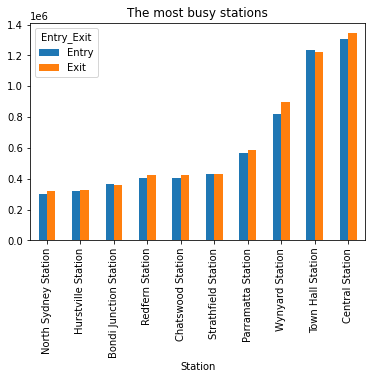

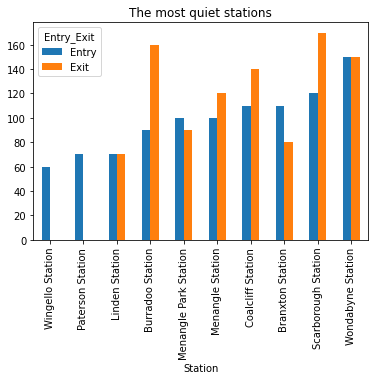

In [15]:
temp = traindf_maxdt.sort_values('Entry')
#Never expected Town hall is so close to Central which is X time bigger.
_ = temp.tail(10).plot(x='Station',kind='bar',title='The most busy stations')
#only heard 4 of them for hiking.
_ = temp.head(10).plot(x='Station',kind='bar',title='The most quiet stations')

In [16]:
temp = traindf[traindf['Trip'] != 'Less than 50'].copy()
temp['Trip'] = temp['Trip'].astype('int')
temp = temp.groupby(['MonthYear','Entry_Exit']).sum('Trip').reset_index()
temp = temp.pivot(index='MonthYear',columns='Entry_Exit',values='Trip')


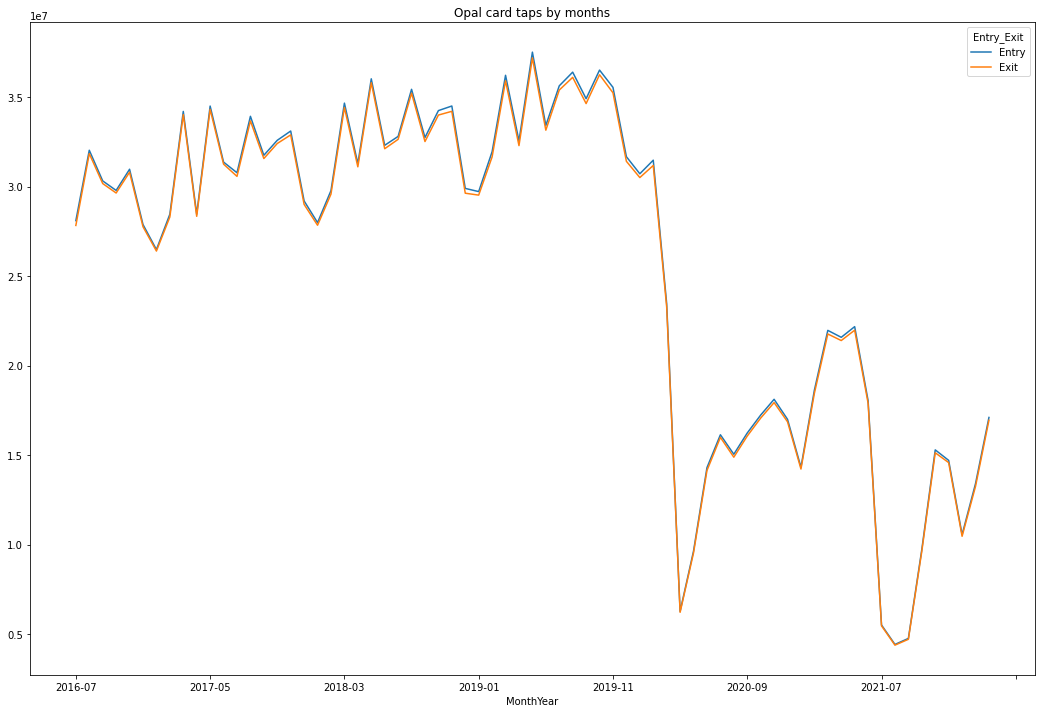

In [17]:
_ = temp.plot(figsize=(18,12),title='Opal card taps by months')

<AxesSubplot:xlabel='MonthYear'>

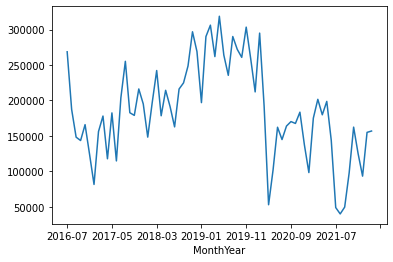

In [18]:
#There are always more people entering than exiting train systems
temp['diff']=temp['Entry']-temp['Exit']
temp['diff'].plot()

In [19]:
#seasonal trend, first removes data after Covid
temp = temp.reset_index()
temp = temp[temp['MonthYear']<'2020-03']

In [20]:
temp.MonthYear = pd.to_datetime(temp.MonthYear)
temp.set_index('MonthYear',inplace=True)

In [21]:
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt

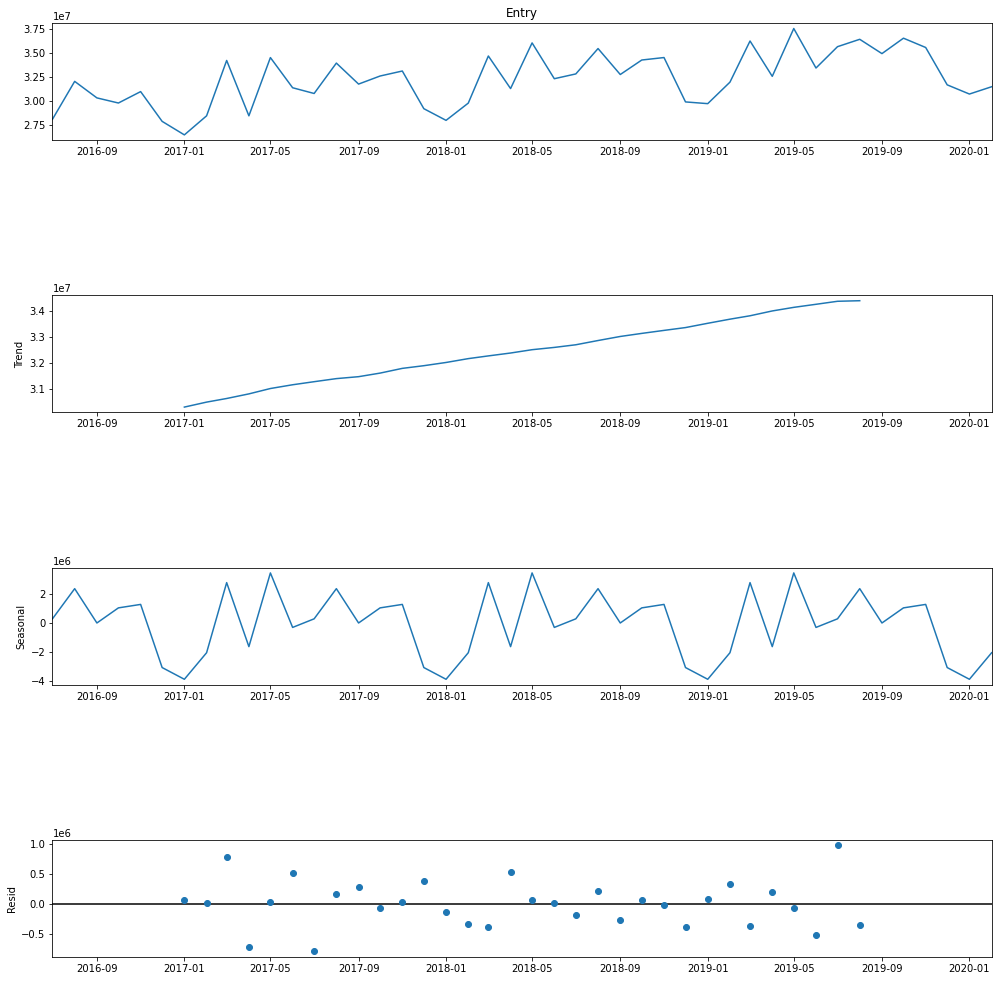

In [22]:
result=seasonal_decompose(temp['Entry'], model='additive', period=12)
fig = result.plot()
fig.set_size_inches((16, 16))
plt.show()

The upward trend is quiet clear and so as the seasonal trend. Until Covid came...

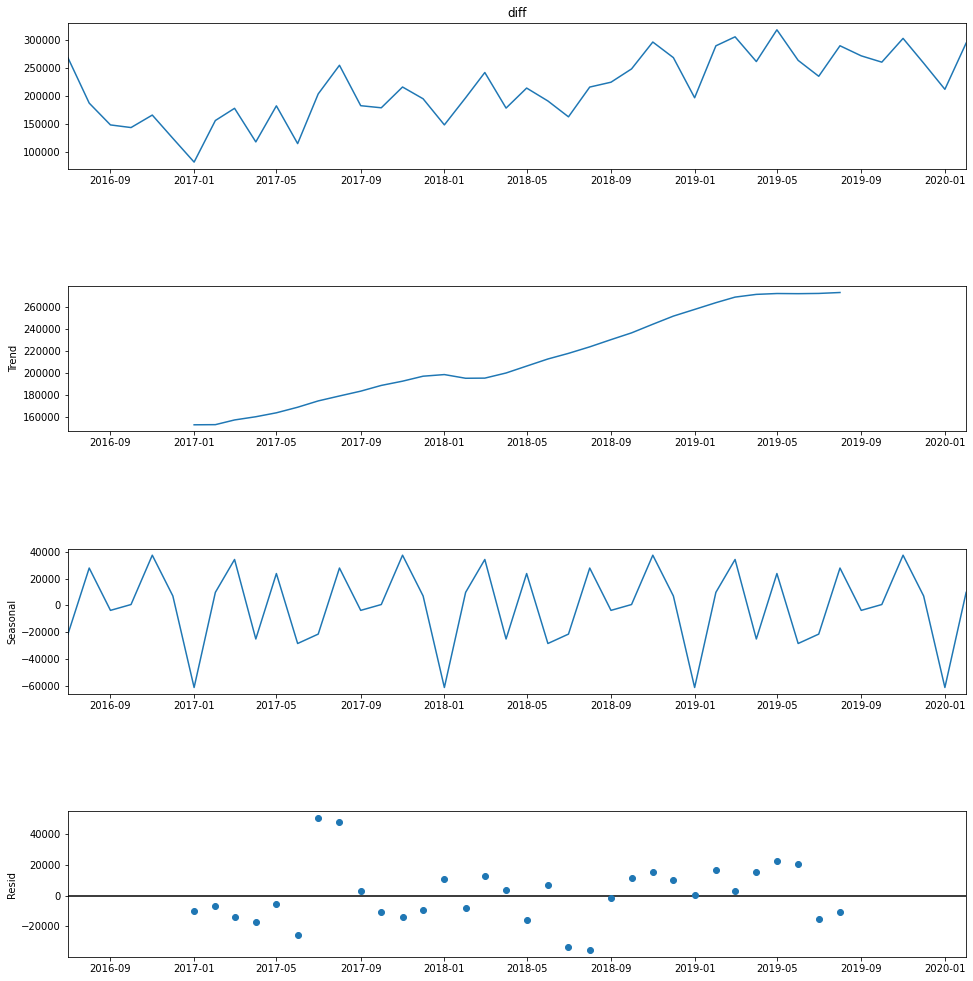

In [23]:
result=seasonal_decompose(temp['diff'], model='additive', period=12)
fig = result.plot()
fig.set_size_inches((16, 16))
plt.show()

In [36]:
np.log10(0.1)

-1.0